<a href="https://colab.research.google.com/github/HughYau/Research-with-Python/blob/main/Dynamic%20Model%20on%20Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from quantecon.markov import DiscreteDP,sa_indices
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import quantecon as qe
from quantecon import compute_fixed_point
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import mpld3 
# %matplotlib notebook

In [ ]:
def Delay(beta = 1,n = 10,gamma = 0.5,p = 0.1,delta = 0.95):

    rho = 0.95

    s_indices = np.arange(n)
    m = 2


    def u(x):
        return np.log(x)

    R = np.empty((n, m))
    Q = np.zeros((n, m, n))

    R[:,1] = (beta - gamma)*s_indices
    R[:,0] = p*beta*s_indices
    R[0,1] = 0
    R[0,0] = -np.infty
    R[1,0] = -np.infty

    for i in range(1,n):
        Q[i,0,i-1] = 1-p
        Q[i,0,0] = p
    Q[:,1,0] = 1


    ddp = DiscreteDP(R,Q,delta)
    v_init = 0  
    res = ddp.solve(method='vi', v_init=v_init)
    return res.v,res.sigma

In [ ]:
sigma_list = np.empty((999,999))
for i in range(999):
    for j in range(999):
        v,sigma = Delay(delta = 0.95,beta = 1,gamma = 0.001*i,p = 0.001*j,n = 21)
        sigma_list[i][j] = sigma.sum()-1

<IPython.core.display.Javascript object>


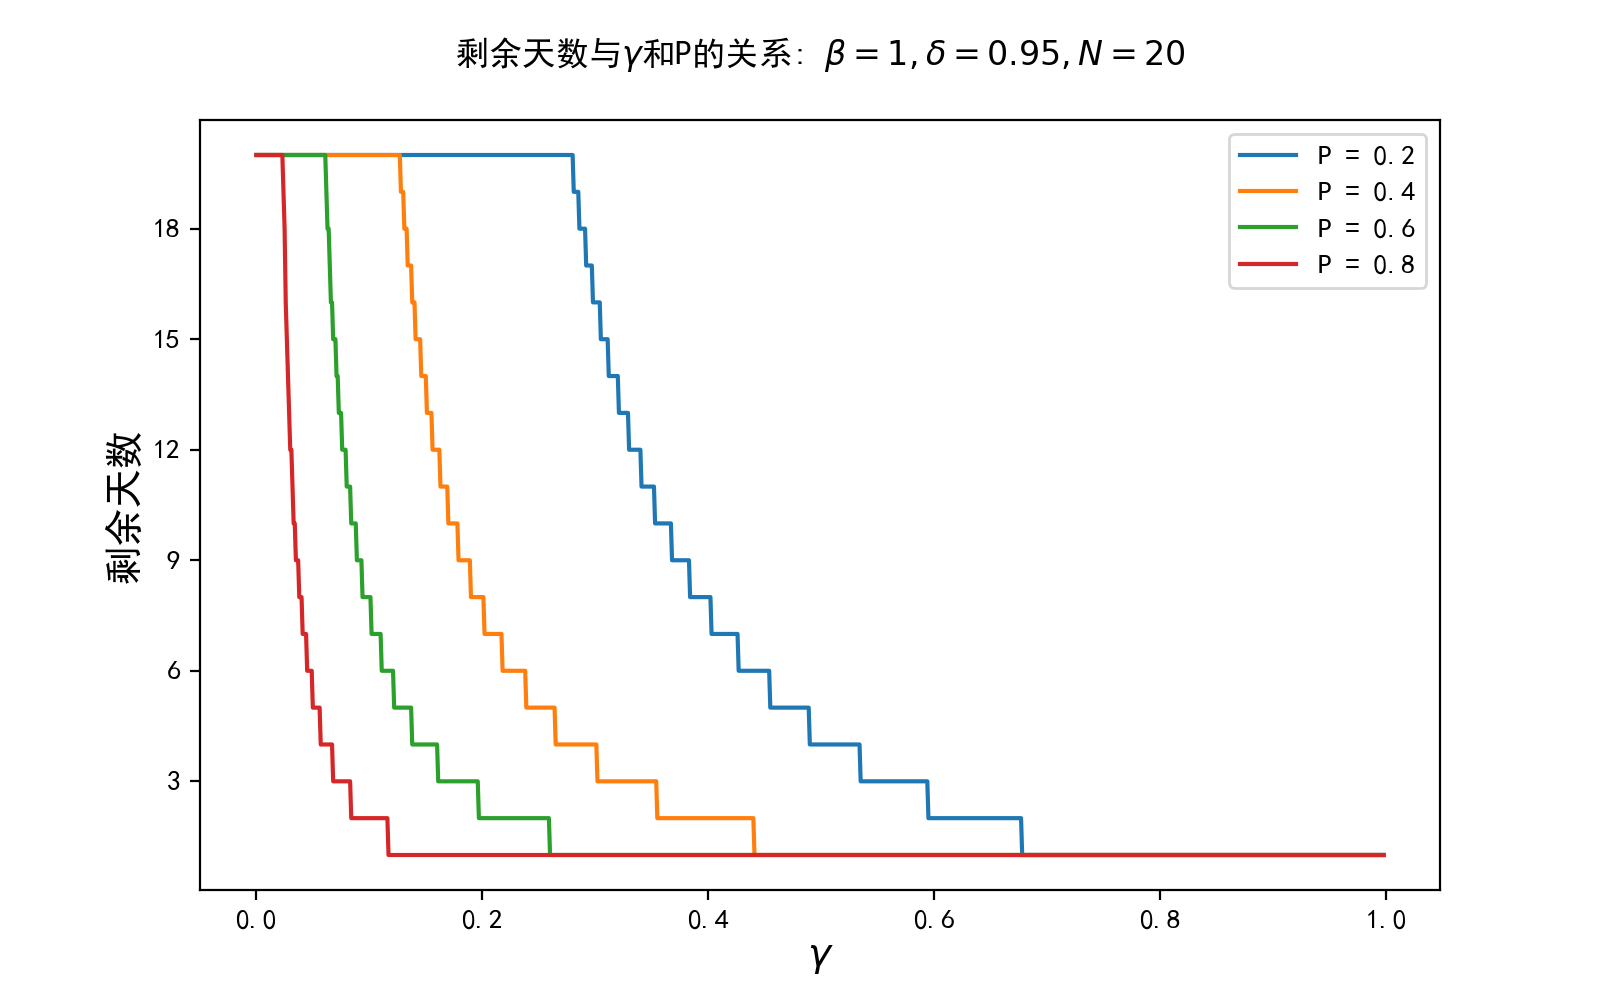

In [ ]:
# nn = 18
# v,sigma = Delay(beta = 0.95,gamma = 0.2,p = 0.4,n = nn)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(999)*0.001, sigma_list[:][200], label=r'P = 0.2')
ax.plot(np.arange(999)*0.001, sigma_list[:][400], label=r'P = 0.4')
ax.plot(np.arange(999)*0.001, sigma_list[:][600], label=r'P = 0.6')
ax.plot(np.arange(999)*0.001, sigma_list[:][800], label=r'P = 0.8')
ax.set_title(r'剩余天数与$\gamma$和P的关系: $\beta = 1,\delta = 0.95,N = 20$'
             , y=1.05)
ax.set_xlabel(r'$\gamma$', fontsize=14)
ax.set_ylabel('剩余天数', fontsize=14)
ax.legend()
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
sigma_list

array([[20., 20., 20., ..., 20., 20., 20.],
       [20., 20., 20., ...,  4.,  3.,  2.],
       [20., 20., 20., ...,  2.,  1.,  1.],
       ...,
       [20.,  4.,  2., ...,  1.,  1.,  1.],
       [20.,  3.,  1., ...,  1.,  1.,  1.],
       [20.,  2.,  1., ...,  1.,  1.,  1.]])

In [ ]:
s_indices, a_indices = np.where(sigma_list == 20)

In [ ]:
s_indices

array([ 0,  0,  0, ..., 96, 97, 98], dtype=int64)

In [ ]:
a_indices

array([0, 1, 2, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>


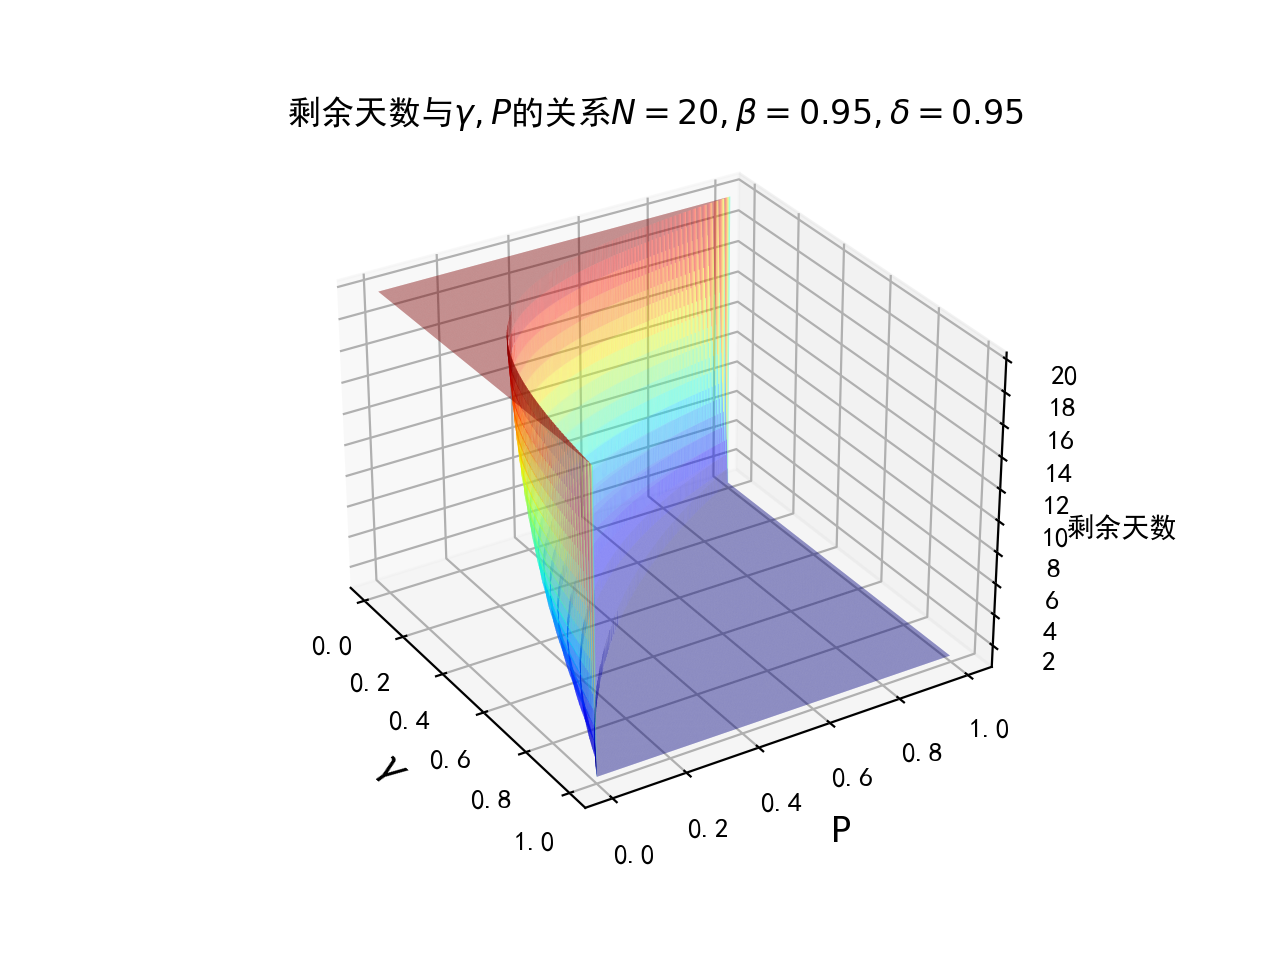

In [ ]:
mpld3.disable_notebook()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tg, eg = np.meshgrid(np.arange(999)*0.001, np.arange(999)*0.001)
ax.plot_surface(tg,
                eg,
                sigma_list,
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.5,
                linewidth=0.25)
# ax.set_zlim(150, 200)
ax.set_xlabel(r'$\gamma$', fontsize=14)
ax.set_ylabel('P', fontsize=14)
ax.set_zlabel('剩余天数', fontsize=10)
ax.view_init(ax.elev, 125)
ax.set_title(r'剩余天数与$\gamma,P$的关系$N = 20,\beta = 0.95,\delta = 0.95$'
             , y=1.05)
plt.gca().zaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

<IPython.core.display.Javascript object>


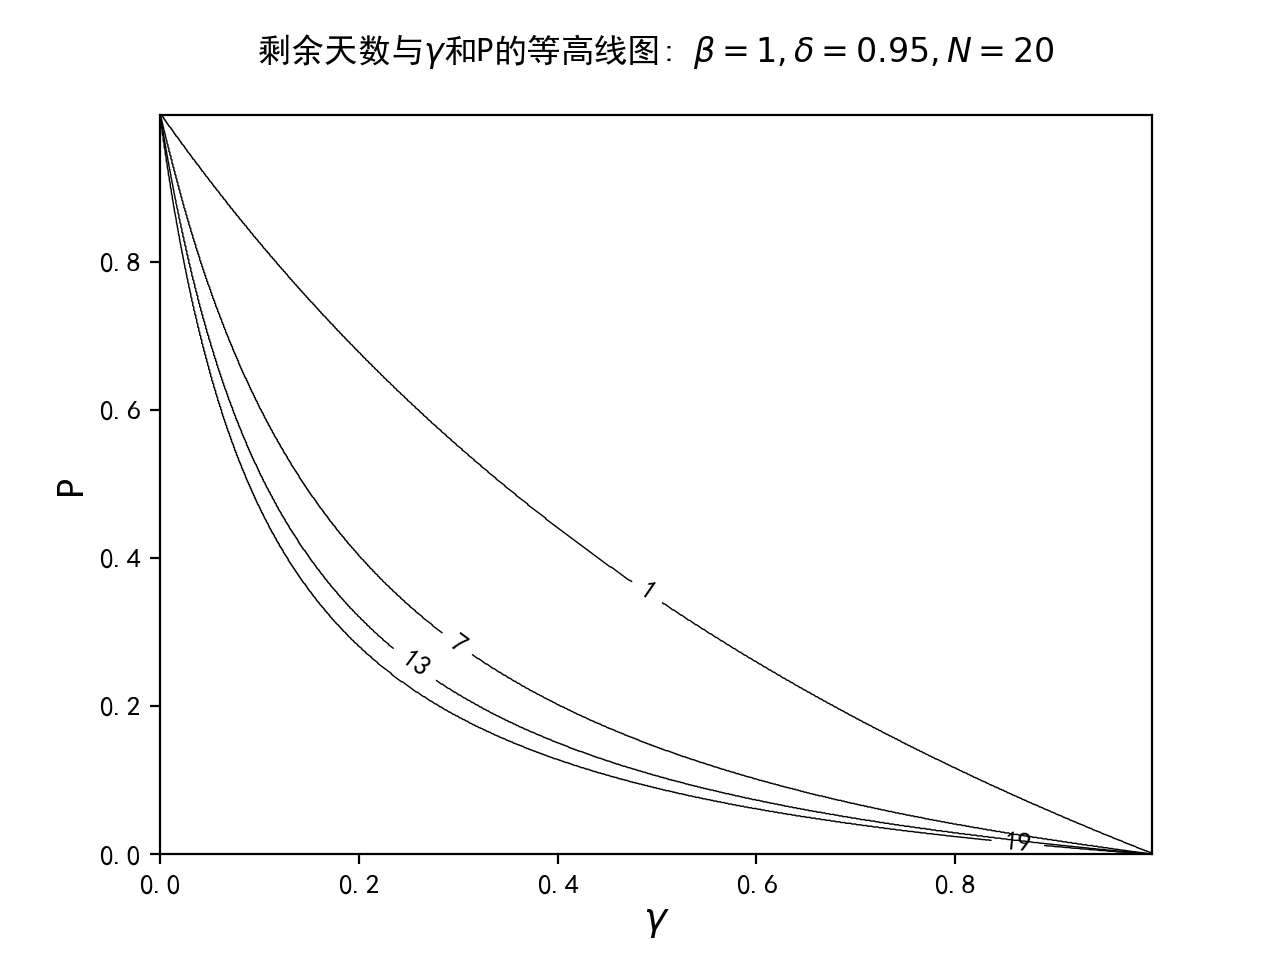

In [ ]:
fig, ax = plt.subplots()
tg, eg = np.meshgrid(np.arange(999)*0.001, np.arange(999)*0.001)
lvls=(1,7,13,19)
# ax.contourf(tg, eg, sigma_list, levels=lvls, cmap=cm.winter, alpha=0.5)
CS1 = ax.contour(tg, eg, sigma_list, colors='k',levels=lvls,linewidths= 0.5)
ax.set_xlabel(r'$\gamma$', fontsize=14)
ax.set_ylabel('P', fontsize=14)
fmt = {} 
strs = ['1', '7','13','19'] 
for l, s in zip(CS1.levels, strs):
    fmt[l] = s 
ax.clabel(CS1, CS1.levels, inline = True, 
           fmt = fmt, fontsize = 10) 
ax.set_title(r'剩余天数与$\gamma$和P的等高线图: $\beta = 1,\delta = 0.95,N = 20$'
             , y=1.05)
# ax.text(1.8, 2.5, 'new life', fontsize=14)
# ax.text(4.5, 2.5, 'new job', fontsize=14, rotation='vertical')
# ax.text(4.0, 4.5, 'stay put', fontsize=14)
# ax.set_title(r'Optimal policy function: $\beta = {0}$'.format(ddp.beta))
plt.show()

In [ ]:
ax.contour?

<IPython.core.display.Javascript object>


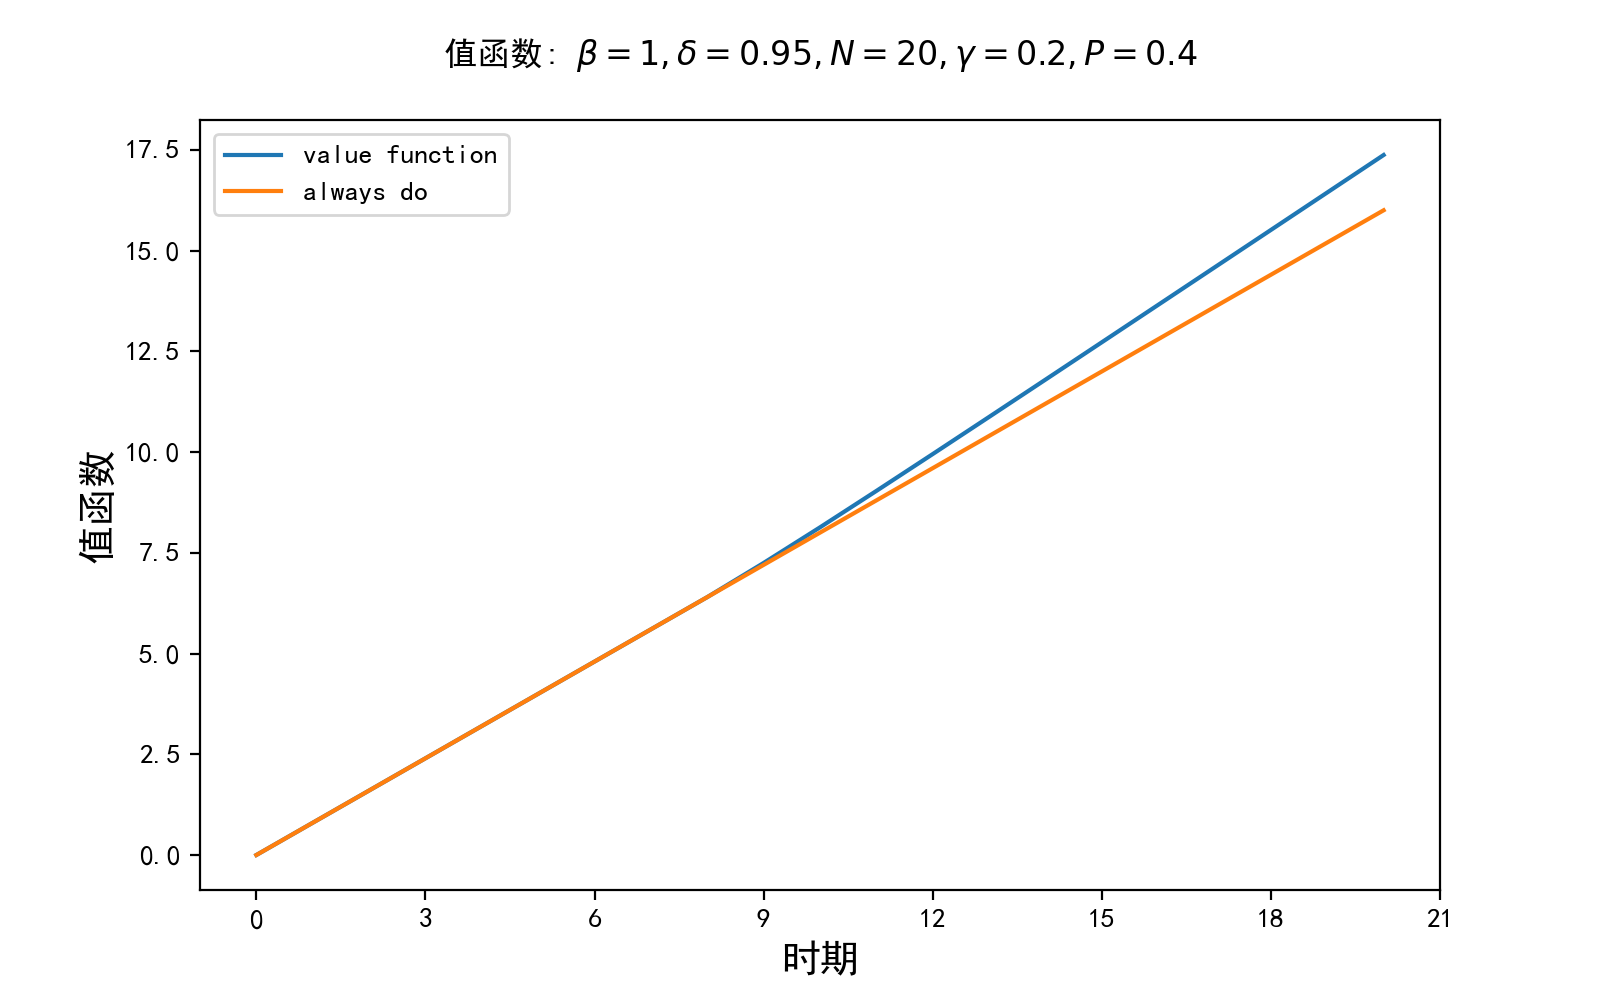

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
v,sigma = Delay(beta = 1,n = 21,gamma = 0.2,p = 0.4)
ax.plot(np.arange(21), v, label= 'value function')
ax.plot(np.arange(21), (1-0.2)*np.arange(21), label='always do')
ax.set_title(r'值函数: $\beta = 1,\delta = 0.95,N = 20,\gamma = 0.2,P = 0.4$'
             , y=1.05)
ax.set_xlabel('时期', fontsize=14)
ax.set_ylabel('值函数', fontsize=14)
ax.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

<IPython.core.display.Javascript object>


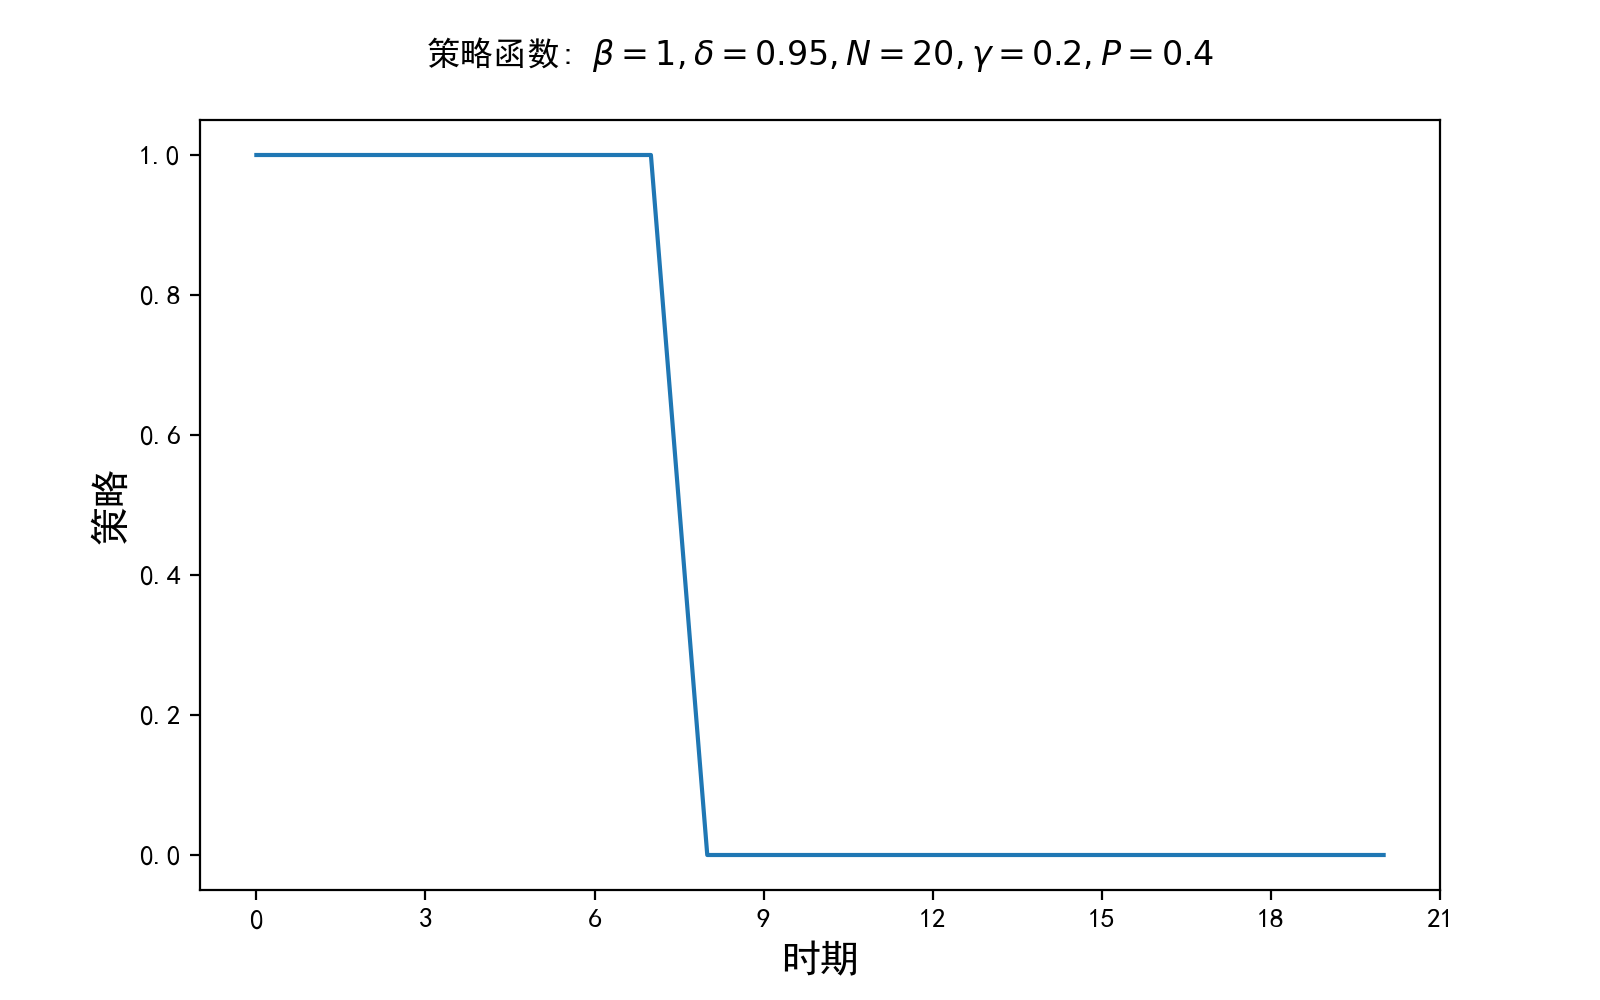

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(21), sigma)
ax.set_title(r'策略函数: $\beta = 1,\delta = 0.95,N = 20,\gamma = 0.2,P = 0.4$'
             , y=1.05)
ax.set_xlabel('时期', fontsize=14)
ax.set_ylabel('策略', fontsize=14)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
sigma_list1 = np.empty(999)
for i in range(999):
    v,sigma = Delay(beta = 0.7+i*0.0003,gamma = 0.2,p = 0.4,n = 20)
    sigma_list1[i]= sigma.sum()-1

<IPython.core.display.Javascript object>


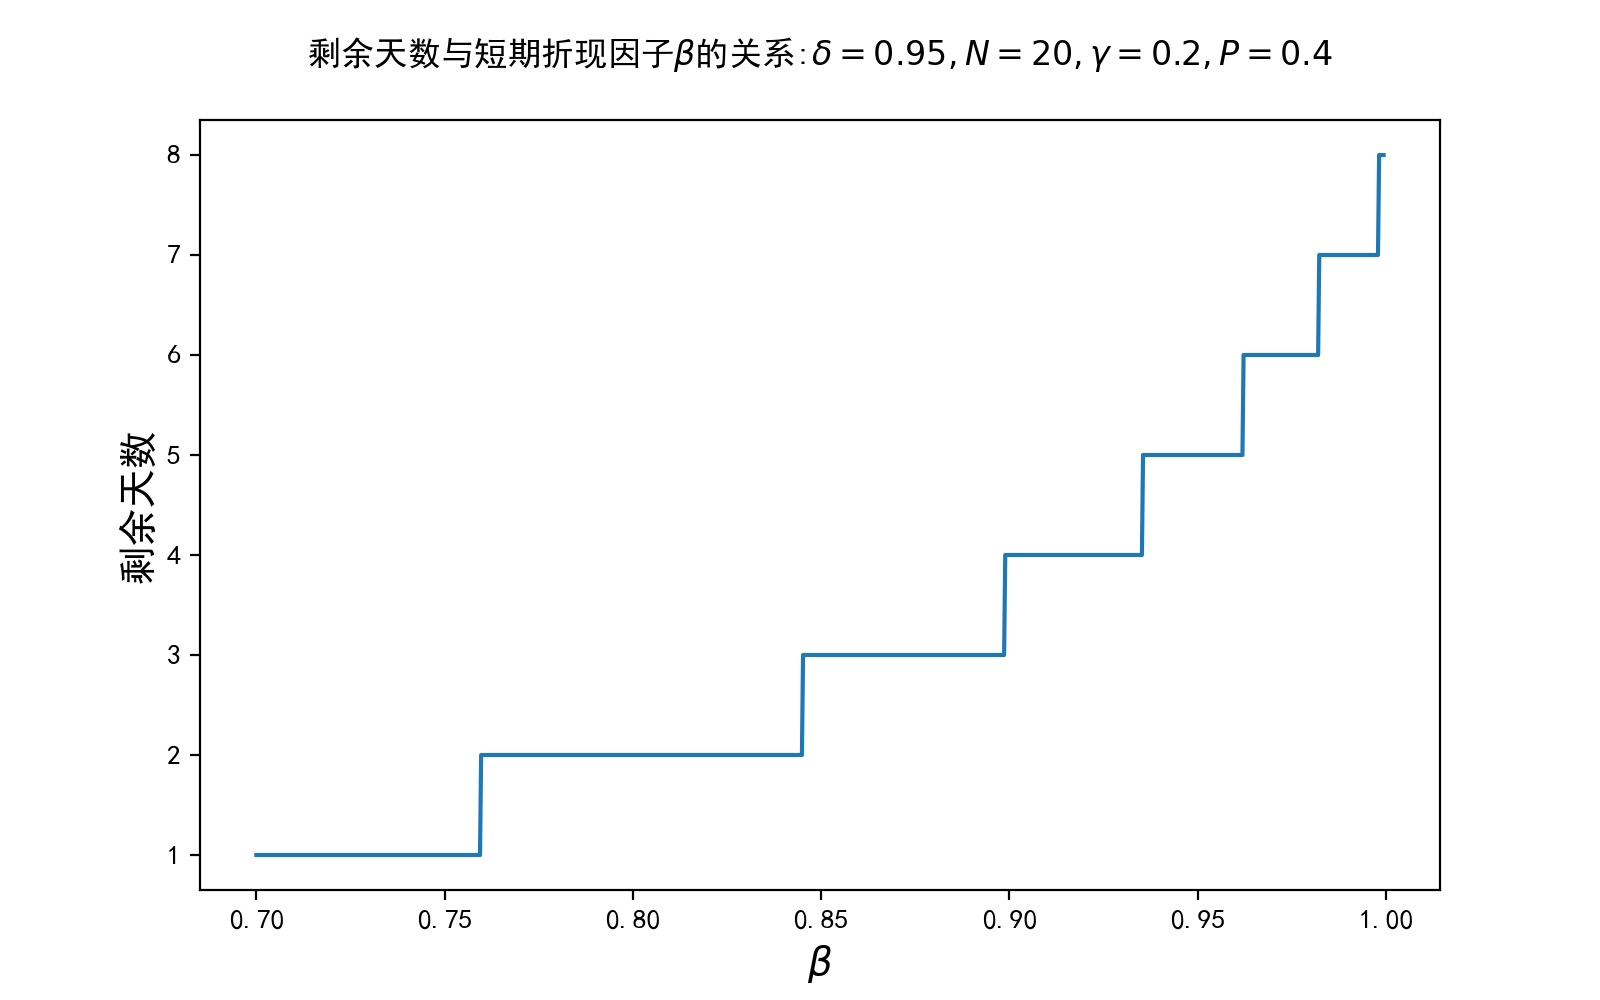

Text(0.5, 1.05, '剩余天数与短期折现因子$\\beta$的关系:$\\delta = 0.95,N = 20,\\gamma = 0.2,P = 0.4$')

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(0.7+np.arange(999)*0.0003, sigma_list1, label=r'$V$')
ax.set_xlabel(r'$\beta$', fontsize=14)
ax.set_ylabel('剩余天数', fontsize=14)
ax.set_title(r'剩余天数与短期折现因子$\beta$的关系:$\delta = 0.95,N = 20,\gamma = 0.2,P = 0.4$'
             , y=1.05)

In [ ]:
sigma_list = np.empty(99)
for i in range(5,104):
    for j in range(99):
        v,sigma = Delay(beta = 0.95,gamma = 0.2,p = 0.4,n = i)
        sigma_list[i-5]= sigma.sum()-1

Text(0.5, 1.05, 'Remained Days with $\\beta,N = 20,\\gamma = 0.2,P = 0.4$')

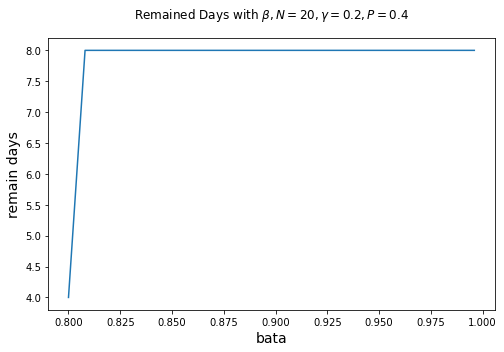

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(0.8+np.arange(99)*0.002, sigma_list, label=r'$V$')
ax.set_xlabel('bata', fontsize=14)
ax.set_ylabel('remain days', fontsize=14)
ax.set_title(r'Remained Days with $\beta,N = 20,\gamma = 0.2,P = 0.4$'
             , y=1.05)

In [ ]:
v_2d = res.v.reshape(n, e)
sigma_2d = res.sigma.reshape(n, e)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
theta = rho**(N-np.arange(N))*gridmax
tg, eg = np.meshgrid(theta, epsilon)
ax.plot_surface(tg,
                eg,
                v_2d.T,
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.5,
                linewidth=0.25)
# ax.set_zlim(150, 200)
ax.set_xlabel('theta', fontsize=14)
ax.set_ylabel('epsilon', fontsize=14)
ax.set_zlabel('value', fontsize=14)
ax.view_init(ax.elev, 225)
ax.set_title(r'Optimal value function: $\beta = {0}$'
             .format(ddp.beta), y=1.05)
plt.show()

NameError: name 'N' is not defined